# PYPIT versus LowRedux for LRISr

In [1]:
%matplotlib inline

In [2]:
# imports
from scipy import stats
from astropy.io import fits
#
from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
# 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# debugger
try:
    from xastropy.xutils import xdebug as debugger
except:
    import pdb as debugger

In [3]:
dpath = '/Users/xavier/PYPIT/Tiffany/lris_red/'

In [4]:
slitb = [20,250,500,1500]

## Load 1D Images

### PYPIT

In [5]:
spec1d = dpath+'Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'
hdu_spec = fits.open(spec1d)
hdu_spec.info()

Filename: /Users/xavier/PYPIT/Tiffany/lris_red/Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      11   ()              
1    O983-S8787-D01-I0022  BinTableHDU     21   2048R x 6C   [D, D, K, D, D, D]   
2    O901-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
3    O402-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
4    O023-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
5    O239-S1470-D02-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
6    O049-S1470-D02-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
7    O652-S1470-D02-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   


In [6]:
pypit_spec = Table(hdu_spec[5].data)
pypit_spec

obj_trace,box_var,box_mask,box_counts,box_sky,box_wave,opt_var,opt_counts,opt_wave
float64,float64,int64,float64,float64,float64,float64,float64,float64
72.3520317698,776.580304641,2,-25.6430414329,28.8729885253,5556.28416875,0.0,0.0,0.0
72.3510426613,789.838747742,2,42.2202358202,26.8129651968,5557.82714283,4239.87813263,37.7350712644,5557.82785631
72.3500553943,846.148850403,2,33.4658001749,30.0027801857,5559.37025676,4252.54288185,20.7237575974,5559.371002
72.3490699686,782.042354596,2,26.9414680641,26.0950869565,5560.91351043,4227.50506557,29.0950888642,5560.91415434
72.3480863842,775.155942483,2,34.5104696754,26.9682320001,5562.45690371,4223.09089385,26.0573520654,5562.45760259
72.347104641,762.669485987,2,24.4953996408,23.7641358556,5564.0004365,0.0,0.0,0.0
72.3461247392,782.256767669,2,73.8756956056,23.9794250034,5565.54410866,4197.18792821,34.911294154,5565.54491596
72.3451466785,788.855390891,2,-20.1272452567,29.5602572568,5567.08792009,0.0,0.0,0.0
72.344170459,734.389437935,2,40.601932755,23.6651913068,5568.63187067,4172.00720063,12.7724960961,5568.632682


### LowRedux

In [7]:
low_file = dpath+'LowRedux/Science/sci-LR.20160216.40478.fits.gz'
lrdx_scihdu = fits.open(low_file)
sciobj = Table(lrdx_scihdu[5].data)[1] # Might have to deal with more than one obj
sciobj

OBJID,SLITID,XFRACPOS,PEAKFLUX,MASKWIDTH,FWHM,FLX_SHFT_WAV,FLX_SHFT_SPA,FWHMFIT [2048],XPOS [2048],YPOS [2048],HAND_AP,HAND_X,HAND_Y,HAND_MINX,HAND_MAXX,HAND_FWHM,HAND_SUB,WAVE_OPT [2048],FLUX_OPT [2048],SIVAR_OPT [2048],IVAR_OPT [2048],SKY_OPT [2048],RN_OPT [2048],NIVAR_OPT [2048],MASK_OPT [2048],FRAC_USE [2048],CHI2 [2048],WAVE_BOX [2048],FLUX_BOX [2048],SIVAR_BOX [2048],IVAR_BOX [2048],NIVAR_BOX [2048],SKY_BOX [2048],RN_BOX [2048],MASK_BOX [2048],MINCOL,MAXCOL,BOX_RAD,ARC_FWHM_FIT [2048],ARC_FWHM_MED,PIX_RES,BINNING [2]
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,int32,float64,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float64,float32,float32,float32,float32,float32,float32,uint8,int32,int32,int16,float32,float64,float64,int32
2,2,0.216834,6.2039,15.5936,4.30028,-5.18,2.84461,4.30028 .. 4.30028,1096.03 .. 1100.54,0.0 .. 2047.0,0,0.0,0.0,0.0,0.0,0.0,0,5547.67325461 .. 8840.67277438,58.2529 .. 19892.1,0.00479526 .. 1.36811e-06,0.00479526 .. 1.36811e-06,169.339 .. 145695.0,10.101 .. 38.0053,0.00456544 .. 1.3584e-06,1 .. 1,1.0 .. 0.0129623,2.22591 .. 2.4444,5547.66964335 .. 8840.67308993,111.29 .. -11668.2,0.00237356 .. 4.04988e-05,0.00237356 .. 4.04988e-05,0.00237356 .. 4.04988e-05,366.234 .. 16253.3,14.8544 .. 12.6842,1 .. 1,1066,1130,7,2.45005 .. 1.68638,2.37127995491,2.37127995491,2 .. 2


## Load 2D Images

### PYPIT

In [8]:
spec2d = dpath+'Science/spec2d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'
hdu = fits.open(spec2d)
print(hdu.info())
pypit_var = hdu[5].data # Detector 2
pypit_skysub = hdu[6].data # Detector 2

Filename: /Users/xavier/PYPIT/Tiffany/lris_red/Science/spec2d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      10   ()              
1    DET1-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
2    DET1-VAR    ImageHDU         8   (1024, 2048)   float64   
3    DET1-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
4    DET2-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
5    DET2-VAR    ImageHDU         8   (1024, 2048)   float64   
6    DET2-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
None


### LowRedux

In [9]:
lwrdx_wavefile = dpath+'LowRedux/wave-LR.20160216.05529.fits'
lwrdx_wave = fits.open(lwrdx_wavefile)[0].data
lwrdx_proc = lrdx_scihdu[0].data
lwrdx_ivar = lrdx_scihdu[1].data
lwrdx_sky = lrdx_scihdu[2].data

----

## Compare variance images (Detector 2)

In [6]:
var_rtio = pypit_var * lwrdx_ivar[:,1024:]

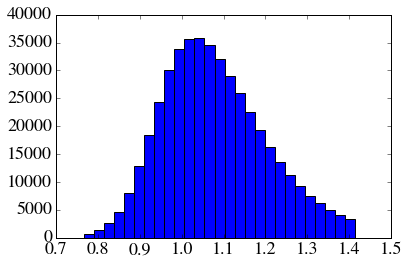

In [21]:
#debugger.ximshow(var_rtio)
debugger.xhist(var_rtio[:,slitb[0]:slitb[1]], xrng=[0.8, 1.4])#, binsz=0.01)

----

## Sky Subtraction at Slitb

### PYPIT

In [17]:
debugger.ximshow(pypit_skysub)

In [38]:
pypit_resid = (pypit_skysub/np.sqrt(pypit_var))[slitb[2]:slitb[3],slitb[0]:slitb[1]]

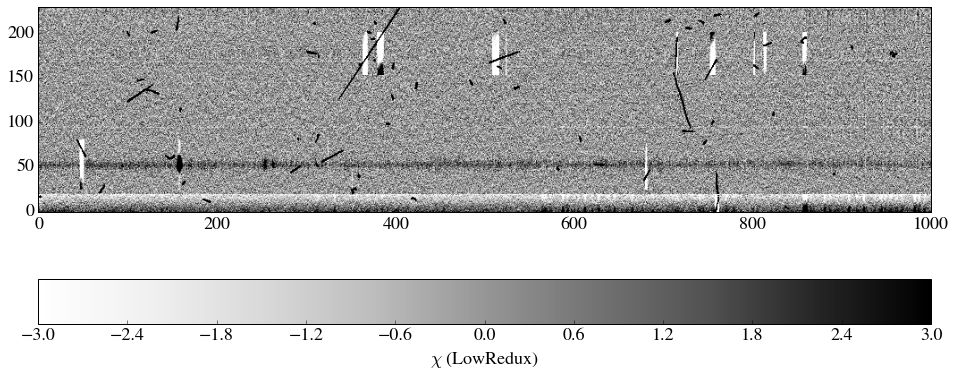

In [39]:
plt.clf()
plt.figure(figsize=(16,8))
#
cm = plt.get_cmap('Greys') 
mplt = plt.imshow(pypit_resid.T, origin='lower', cmap=cm)
mplt.set_clim(vmin=-3, vmax=3.)
cb = plt.colorbar(mplt,orientation='horizontal')
cb.set_label(r'$\chi$ (LowRedux)',fontsize=18.)
#
plt.show()
plt.close()

#### Streaks are due to bad sky sub in PYPIT

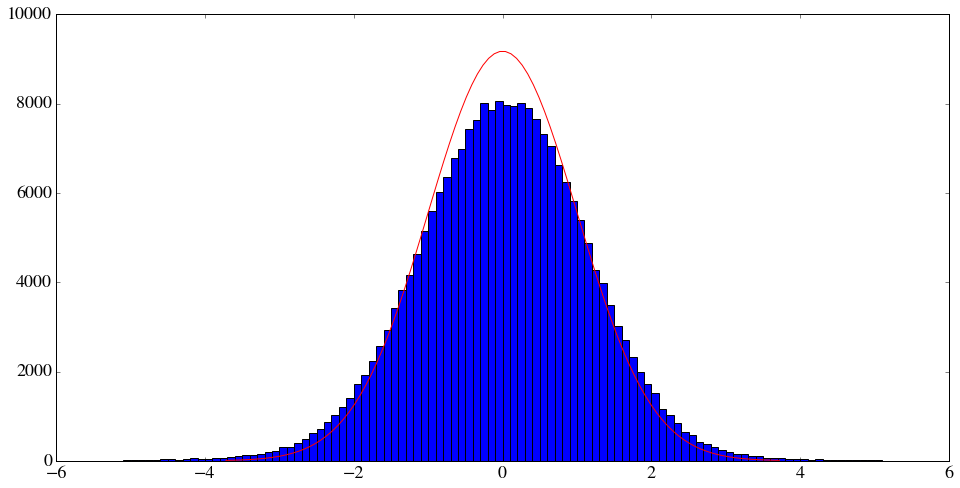

In [43]:
binsz = 0.1
plt.clf()
plt.figure(figsize=(16,8))
ax = plt.gca()
debugger.xhist(pypit_resid,xrng=[-5,5],binsz=binsz,ax=ax)
# PDF for Gaussian
#area = lwrdx_chi.size * binsz
area=pypit_resid.size*binsz
xppf = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
yppf = area*stats.norm.pdf(xppf)
ax.plot(xppf, yppf, 'r-', alpha=1.0)
plt.show()

----

## Trace

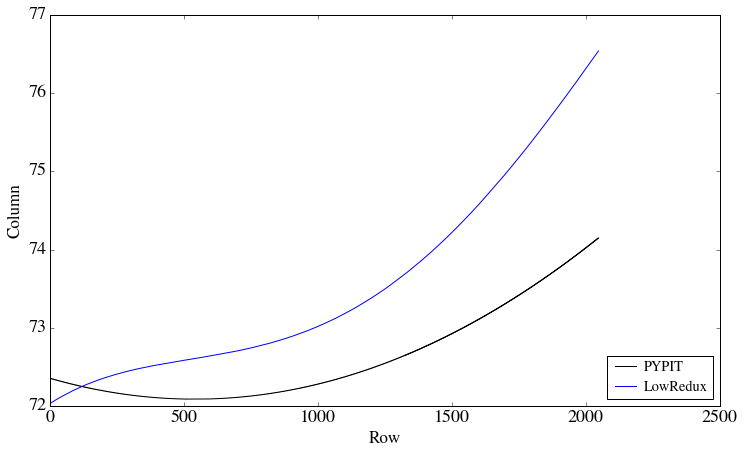

In [65]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
# PYPIT
ax.plot(pypit_spec['obj_trace'], 'k-', drawstyle='steps', label='PYPIT')
# LowRedux
ax.plot(sciobj['XPOS']-1024, '-', color='blue', label='LowRedux')
# Axes
#ax.set_ylim(0.,np.median(pys2n)*2.)
ax.set_xlabel('Row',fontsize=17.)
ax.set_ylabel('Column',fontsize=17.)
# Legend
legend = plt.legend(loc='lower right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

#### LowRedux looks better by eye

----

## Boxcar Extraction

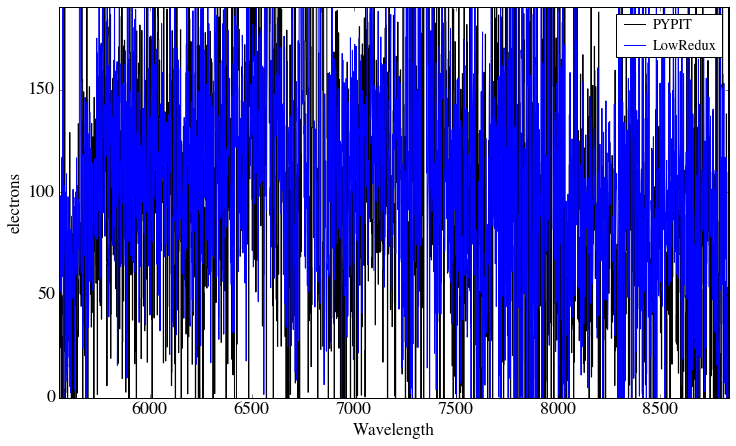

In [20]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['box_counts'])*2.
# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_counts'], 'k-', drawstyle='steps',label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_BOX'], sciobj['FLUX_BOX'], '-', color='blue',label='LowRedux')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(np.min(pypit_spec['box_wave']), np.max(pypit_spec['box_wave']))
ax.set_ylim(0.,ymax)
#ax.set_xlim(6720.,6790.)
#ax.set_ylim(0.,800)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

## Optimal Extraction

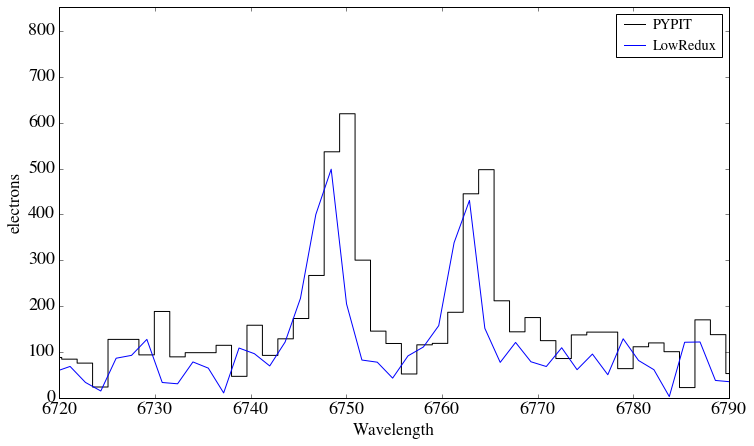

In [15]:
srt = np.argsort(pypit_spec['opt_wave'])
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['opt_counts'])*10.
# PYPIT
ax.plot(pypit_spec['opt_wave'][srt], pypit_spec['opt_counts'][srt], 'k-', drawstyle='steps',label='PYPIT')
#ax.scatter(pypit_spec['opt_wave'], pypit_spec['opt_counts'], label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_OPT']+12, sciobj['FLUX_OPT'], '-', color='blue',label='LowRedux')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(6720.,6790.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
ax.set_ylim(0.,ymax)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

### Versus boxcar (PYPIT)

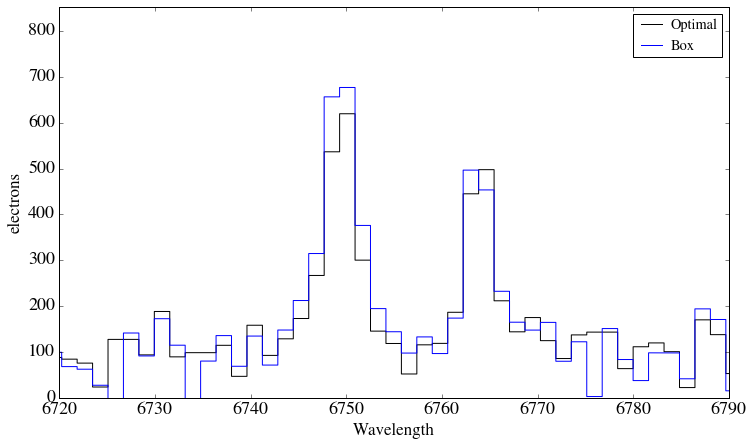

In [16]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['opt_counts'])*10.
# PYPIT optimal
srt = np.argsort(pypit_spec['opt_wave'])
ax.plot(pypit_spec['opt_wave'][srt], pypit_spec['opt_counts'][srt], 'k-', drawstyle='steps',label='Optimal')
# PYPIT boxcar
srtb = np.argsort(pypit_spec['box_wave'])
ax.plot(pypit_spec['box_wave'][srtb], pypit_spec['box_counts'][srtb], 'b-', drawstyle='steps',label='Box')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# Axes
ax.set_xlim(6720.,6790.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
ax.set_ylim(0.,ymax)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()